In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
years = '2002-2024'
df = pd.read_csv('./data/' + years + '_all.csv', index_col=0)

# converting column names from korean to english
df.rename(columns={'평균 수온(°C)':'temperature'}, inplace=True)
display(df)

,temperature
2002-01-01,12.9
2002-01-02,12.2
2002-01-03,11.9
2002-01-04,11.7
2002-01-05,11.7
...,...
2023-12-27,15.5
2023-12-28,15.2
2023-12-29,15.3
2023-12-30,14.4


In [3]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

In [4]:
def mape(y_pred, y_true):
  return (np.abs(y_pred - y_true)/y_true).mean() * 100

def mae(y_pred, y_true):
  return np.abs(y_pred - y_true).mean()

def mse(y_pred, y_true):
  return np.mean((np.array(y_true) - np.array(y_pred)) ** 2)

def rmse(y_pred, y_true):
  return np.sqrt(mse(y_pred, y_true))

def r_squered(y_pred, y_true):
  return r2_score(y_true, y_pred)

/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.84123D-01    |proj g|=  9.96427D-03


 This problem is unconstrained.



At iterate    5    f=  9.84054D-01    |proj g|=  7.33457D-04

At iterate   10    f=  9.84053D-01    |proj g|=  8.57484D-04

At iterate   15    f=  9.84018D-01    |proj g|=  2.27617D-03

At iterate   20    f=  9.84006D-01    |proj g|=  4.12532D-04

At iterate   25    f=  9.84005D-01    |proj g|=  1.06220D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     25     31      1     0     0   1.062D-04   9.840D-01
  F =  0.98400471687548086     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
--- predict ---
2023-12-17    15.192137
2023-12-18    15.270251
2023-12-19    15.860560
2023-12-20    15.845825
2

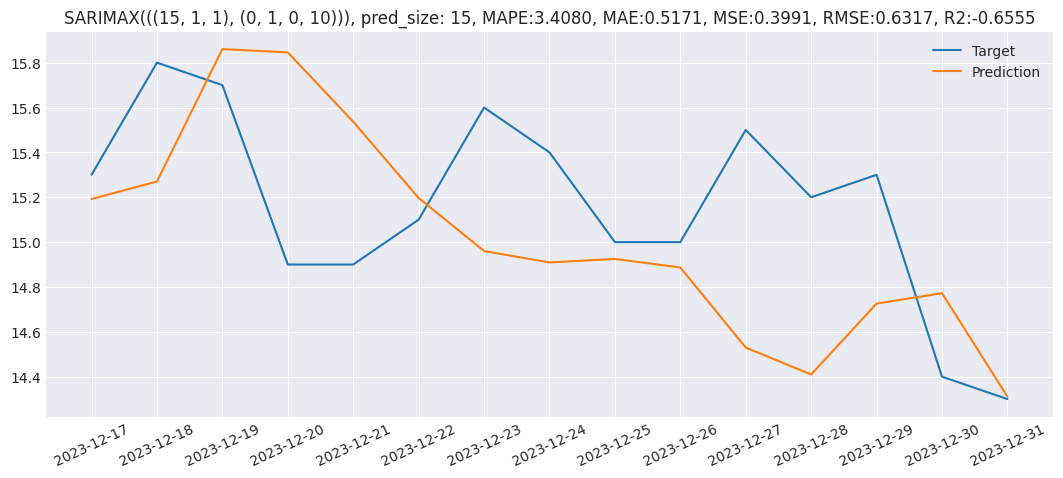

order: (15, 1, 1), seasonal_order: (0, 1, 0, 10), pred_size: 15


/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16200D+00    |proj g|=  6.65282D-01


 This problem is unconstrained.



At iterate    5    f=  9.84625D-01    |proj g|=  1.19060D-02

At iterate   10    f=  9.84464D-01    |proj g|=  5.72746D-04

At iterate   15    f=  9.84461D-01    |proj g|=  8.05750D-04

At iterate   20    f=  9.84425D-01    |proj g|=  3.36756D-03

At iterate   25    f=  9.84412D-01    |proj g|=  7.66278D-04

At iterate   30    f=  9.84410D-01    |proj g|=  1.68268D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     32     36      1     0     0   1.205D-05   9.844D-01
  F =  0.98441005368805801     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
--- predict ---
2023-12-02    17.624289
2023-12-03 

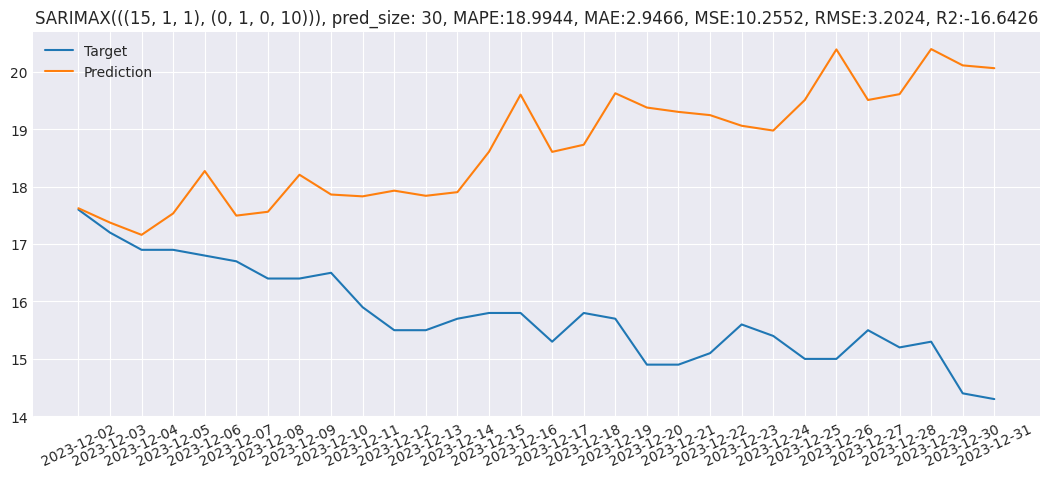

order: (15, 1, 1), seasonal_order: (0, 1, 0, 10), pred_size: 30


,MAPE,MAE,MSE,RMSE,R2
order,,,,,
"((15, 1, 1), (0, 1, 0, 10), 15)",3.4080,0.5171,0.3991,0.6317,-0.6555
"((15, 1, 1), (0, 1, 0, 10), 30)",18.9944,2.9466,10.2552,3.2024,-16.6426


In [5]:
def fit_model_sarimax(order, seasonal_order, pred_size):
    trn, tst = df[:-pred_size], df[-pred_size:]
    model = SARIMAX(trn, order=order, seasonal_order=seasonal_order).fit()
    prd = model.predict(start=len(trn), end=len(trn) + (pred_size-1), dynamic=True)
    print('--- predict ---')
    print(prd)

    r1 = mape(prd.values , tst.values)
    r2 = mae(prd.values , tst.values)
    r3 = mse(prd.values , tst.values)
    r4 = rmse(prd.values , tst.values)
    r5 = r_squered(prd.values , tst.values)
    print('--- Evaluation Metrics ---')
    print(r1, r2, r3, r4, r5)

    result_list.append([(order, seasonal_order, pred_size), r1, r2, r3, r4, r5])

    plt.figure(figsize=(13, 5))
    plt.title(f"SARIMAX({order, seasonal_order}), pred_size: {pred_size}, MAPE:{r1:.4f}, MAE:{r2:.4f}, MSE:{r3:.4f}, RMSE:{r4:.4f}, R2:{r5:.4f}")
    plt.plot(tst.index, tst, label="Target")
    plt.plot(tst.index, prd, label="Prediction")
    plt.xticks(rotation=25)
    plt.legend()
    plt.savefig(f'./fig/SARIMAX_result_{order, seasonal_order, pred_size}.png')
    plt.show()

ord_list = [[(15, 1, 1), (0, 1, 0, 365), 15], [(15, 1, 1), (0, 2, 0, 365), 15],
            [(15, 1, 1), (0, 3, 0, 365), 15], [(15, 1, 1), (0, 4, 0, 365), 15],
            [(15, 1, 1), (0, 1, 0, 365), 30], [(15, 1, 1), (0, 2, 0, 365), 30],
            [(15, 1, 1), (0, 3, 0, 365), 30], [(15, 1, 1), (0, 4, 0, 365), 30],
            [(15, 1, 1), (0, 1, 0, 365), 60], [(15, 1, 1), (0, 2, 0, 365), 60],
            [(15, 1, 1), (0, 3, 0, 365), 60], [(15, 1, 1), (0, 4, 0, 365), 60],
            [(15, 1, 1), (0, 1, 0, 365), 90], [(15, 1, 1), (0, 2, 0, 365), 90],
            [(15, 1, 1), (0, 3, 0, 365), 90], [(15, 1, 1), (0, 4, 0, 365), 90]]
result_list = []

for order, seasonal_order, pred_size in ord_list:
    trn, tst = df[:-pred_size], df[-pred_size:]

    fit_model_sarimax(order, seasonal_order, pred_size)
    print(f'order: {order}, seasonal_order: {seasonal_order}, pred_size: {pred_size}')

pd.set_option('float_format', '{:.4f}'.format)
result_df = pd.DataFrame(result_list, columns=['order', 'MAPE', 'MAE', 'MSE', 'RMSE', 'R2'])
result_df.set_index('order', inplace=True)
result_df.to_csv('./result/SARIMAX_result_' + years + '_all.csv')
result_df